## Importing Libraries

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob
import argparse
import imutils
import cv2
import os
# import sys
# np.set_printoptions(threshold=sys.maxsize)

## Preprocessing

In [2]:
x_train = []
y_train = []
x_test = []
y_test = []

for i in os.listdir('./TA_dataset/train'):
    for filename in glob.glob('TA_dataset/train/'+str(i)+'/*.png'):
        im = cv2.imread(filename, 0)        
        im = cv2.resize(im, (128, 128)) # resize to 128 * 128 pixel size
        blur = cv2.GaussianBlur(im, (5,5), 0) # using Gaussian blur
        ret, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        x_train.append(th)
        y_train.append(i) # append class
        
for i in os.listdir('./TA_dataset/test'):
    for filename in glob.glob('TA_dataset/test/'+str(i)+'/*.png'):
        im = cv2.imread(filename, 0)        
        im = cv2.resize(im, (128, 128)) # resize to 128 * 128 pixel size
        blur = cv2.GaussianBlur(im, (5,5), 0) # using Gaussian blur
        ret, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        x_test.append(th)
        y_test.append(i) # append class

In [3]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
y_train = np.array(y_train)
# x_train = np.array(x_train)
# x_test = np.array(x_test)

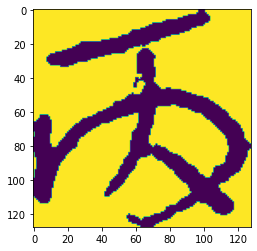

In [4]:
plt.imshow(x_train[0])
plt.show()

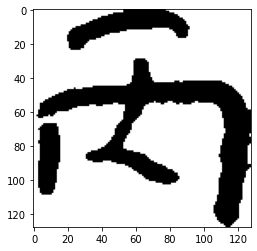

In [5]:
plt.imshow(x_test[0], 'gray')
plt.show()

## KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
neigh = KNeighborsClassifier(n_neighbors=3)
xtrain = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[1]))
xtest = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[1]))

In [8]:
prediction = neigh.fit(xtrain, y_train).predict(xtrain)
prediction
print(accuracy_score(y_train,prediction))

0.7958899338209683


## KNN with HOG Feature Extraction

In [9]:
from skimage.feature import hog

In [10]:
features = np.array(xtrain, 'int64')
labels = y_train

In [11]:
list_hog_fd = []
for feature in features:
    fd = hog(
        feature.reshape((128, 128)), 
        orientations=8, 
        pixels_per_cell=(64, 64), 
        cells_per_block=(1, 1), )
    list_hog_fd.append(fd)

In [13]:
hog_features = np.array(list_hog_fd)
hog_features

array([[0.50680548, 0.        , 0.58667538, ..., 0.        , 0.5       ,
        0.        ],
       [0.5       , 0.        , 0.5       , ..., 0.        , 0.5       ,
        0.        ],
       [0.47101056, 0.        , 0.58203798, ..., 0.        , 0.5       ,
        0.        ],
       ...,
       [0.52814014, 0.        , 0.52814014, ..., 0.        , 0.43648836,
        0.        ],
       [0.46927558, 0.        , 0.50983018, ..., 0.        , 0.5       ,
        0.        ],
       [0.48516699, 0.        , 0.5048475 , ..., 0.        , 0.47222902,
        0.        ]])

In [ ]:
'''
If you haven't run KNN before, you need to run this!
'''
# neigh = KNeighborsClassifier(n_neighbors=3)
# xtrain = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[1]))
# xtest = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[1]))

In [14]:
prediction = neigh.fit(hog_features, labels).predict(hog_features)
prediction
print(accuracy_score(labels,prediction))

0.6318355973528388


## KNN with Skeletoning

In [ ]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(x_train[0])

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
xtrain = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[1]))
xtest = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[1]))

In [ ]:
from sklearn.metrics import accuracy_score
prediction = neigh.fit(xtrain, y_train).predict(xtrain)
prediction
print(accuracy_score(y_train,prediction))

## Bonus -- Otsu's Method Overview

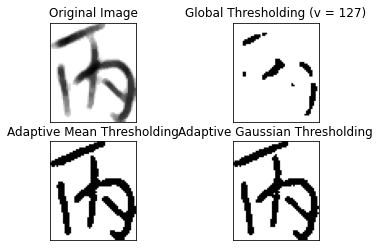

In [16]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('TA_dataset/train/丙/2676.png',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

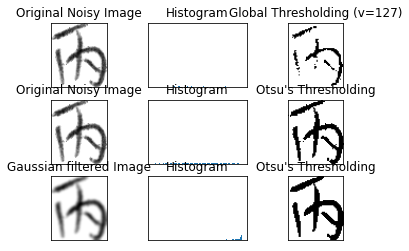

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('TA_dataset/train/丙/2676.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()